Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from google.colab import files
import io




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#installing interactive tables library
!pip install itables

     |████████████████████████████████| 41 kB 358 kB/s 


In [3]:
#upload file from disk drive to colab
uploaded=files.upload()
df = pd.read_csv(io.BytesIO(uploaded['netflix_titles_nov_2019.csv']))

Saving netflix_titles_nov_2019.csv to netflix_titles_nov_2019.csv


In [4]:
#activate interactive tables for Data Frames!
from itables import init_notebook_mode
init_notebook_mode(all_interactive=False)

<IPython.core.display.Javascript object>

In [5]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [6]:
df.describe()

,show_id,release_year
count,5.837000e+03,5837.000000
mean,7.730079e+07,2013.688539
std,9.479777e+06,8.419088
min,2.698800e+05,1925.000000
25%,8.004520e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024188e+07,2018.000000
max,8.122720e+07,2020.000000


In [7]:
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [8]:
len(df.index)

5837

In [9]:
df.fillna(' ')

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,,,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


**Drop Useles Columns Show_ID**

In [10]:
df.drop('show_id',axis=1,inplace=True)
df.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


**Drop Duplicates**



In [11]:
df_clean=df.drop_duplicates()

In [12]:
df_clean[df_clean.duplicated()]

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type


**Add Number of Cast**

In [13]:
df_clean['cast']=df_clean['cast'].replace(np.nan,'Unknown')
def cast_counter(cast):
    if cast=='Unknown':
        return 0
    else:
      #split string to a list and calculate the len of the list
        lst=cast.split(',')
        length=len(lst)
        return length
df_clean['number_of_cast']=df_clean['cast'].apply(cast_counter)
df_clean['cast']=df['cast'].replace('Unknown',np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [14]:
df_clean.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,number_of_cast
0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,8
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,1
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,8
3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,9
4,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,10


**Replace NaN ratings with ratings mode**

In [15]:
df_clean['rating'].fillna(df_clean['rating'].mode()[0])

0       TV-14
1        TV-G
2       TV-14
3       TV-14
4        TV-Y
        ...  
5832       NR
5833    TV-14
5834       NR
5835    TV-MA
5836       NR
Name: rating, Length: 5836, dtype: object

In [16]:
df_clean=df.replace({'rating':np.NaN},df_clean['rating'].mode()[0])


In [17]:
df_clean.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [18]:
df_clean.isnull().sum()

title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating             0
duration           0
listed_in          0
description        0
type               0
dtype: int64

**Replace NaNs of date added to Jan 1, and use .format to add mode of release year**

In [19]:
df_clean['date_added']=df_clean["date_added"].fillna('1st Jan {}'.format(df_clean['release_year'].mode()[0]))

In [20]:
cl_df=df_clean
cl_df.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",1st Jan 2018,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [21]:
df['country'].values

array(['South Korea', nan, 'India', ..., 'Denmark', 'United States',
       'United States'], dtype=object)

In [22]:
cl_df.index

RangeIndex(start=0, stop=5837, step=1)

**Replace Country who's genre is Anime**

In [23]:
for i,j in zip(cl_df['country'].values,cl_df.index):
  if i==np.NaN:
    if ('Anime' in cl_df.loc[j,'listed_in']) or ('anime' in cl_df.loc[j,'listed_in']):
      cl_df[j,'country']='Japan'
    else:
      continue
  else:
     continue  

In [24]:
cl_df.loc[10:15,['country' , 'listed_in']]

,country,listed_in
10,Nigeria,"Comedies, Independent Movies, International Mo..."
11,United States,Reality TV
12,Nigeria,"Action & Adventure, Comedies, International Mo..."
13,NaN,"International TV Shows, Romantic TV Shows, TV ..."
14,Nigeria,"Dramas, International Movies, Thrillers"
15,United States,Docuseries


In [25]:
cl_df.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",1st Jan 2018,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


**Changing type of date added column**

In [26]:
cl_df['date_added'].astype('datetime64[ns]')

0      2019-11-30
1      2019-11-30
2      2019-11-30
3      2019-11-29
4      2018-01-01
          ...    
5832   2010-11-01
5833   2009-11-18
5834   2009-05-05
5835   2008-02-04
5836   2008-01-01
Name: date_added, Length: 5837, dtype: datetime64[ns]

## **EDA**


In [27]:
##As UR and NR rating is the same thing
for i in df.index:
    if df.loc[i,'rating']=='UR':
        df.loc[i,'rating']='NR'

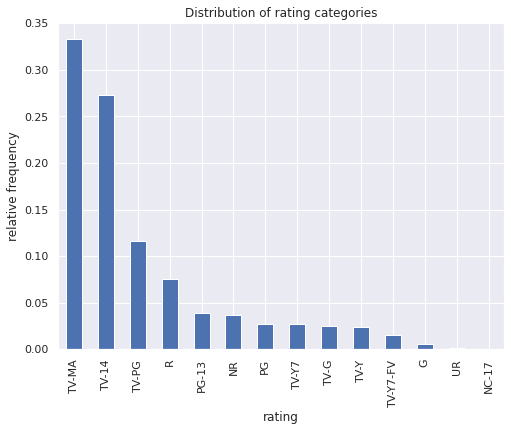

In [28]:
plt.figure(figsize=(8,6))
cl_df['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

### TV-MA is the type of content which is produced the most in **netflix**

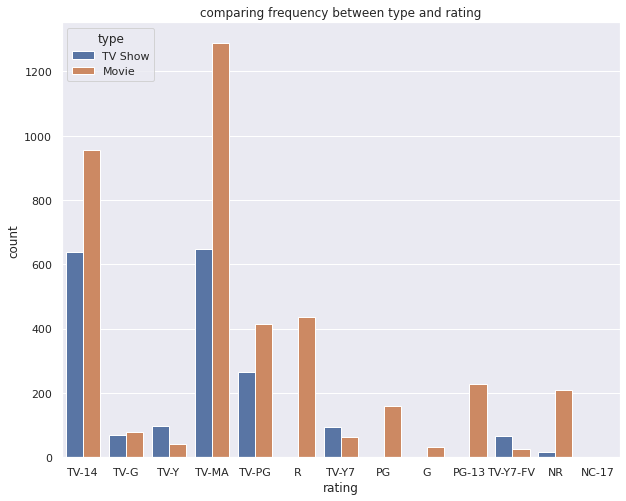

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('comparing frequency between type and rating')
plt.show()

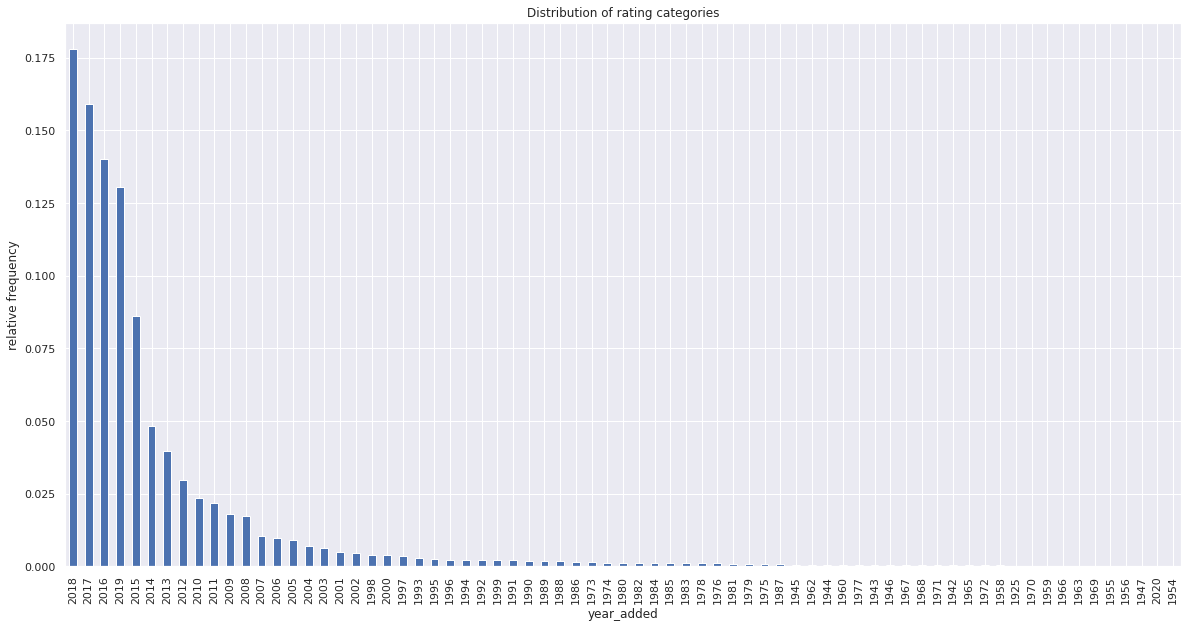

In [30]:
plt.figure(figsize=(20,10))
cl_df['release_year'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('year_added')
plt.ylabel('relative frequency')
plt.show()

In [37]:
cl_df['country'].value_counts()

United States                                           1907
India                                                    697
United Kingdom                                           336
Japan                                                    168
Canada                                                   139
                                                        ... 
Norway, Denmark, Netherlands, Sweden                       1
Ireland, United Kingdom, Greece, France, Netherlands       1
Israel, Germany                                            1
Canada, Germany, France, United States                     1
Spain, Mexico, France                                      1
Name: country, Length: 527, dtype: int64

## **United States and India were among the most countries where Netflix is used the most**

In [45]:
df_cunt=cl_df[(cl_df['country']=='United States') | (cl_df['country']=='India') | (cl_df['country']=='United Kingdom') | (cl_df['country']=='Japan') | (cl_df['country']=='Japan')]
df_cunt.head()


,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
11,Sugar Rush Christmas,NaN,"Hunter March, Candace Nelson, Adriano Zumbo",United States,"November 29, 2019",2019,TV-PG,1 Season,Reality TV,"It's everything you love about ""Sugar Rush"" – ...",TV Show
15,The Movies That Made Us,NaN,NaN,United States,"November 29, 2019",2019,TV-MA,1 Season,Docuseries,These blockbusters brought us together and gav...,TV Show
16,Holiday Rush,Leslie Small,"Romany Malco, Sonequa Martin-Green, Darlene Lo...",United States,"November 28, 2019",2019,TV-PG,94 min,"Children & Family Movies, Dramas",A widowed radio DJ and his four spoiled kids n...,Movie
17,Levius,NaN,"Nobunaga Shimazaki, Junichi Suwabe, Takahiro S...",Japan,"November 28, 2019",2019,TV-14,1 Season,"Anime Series, International TV Shows",Young Levius rises through the ranks in the br...,TV Show


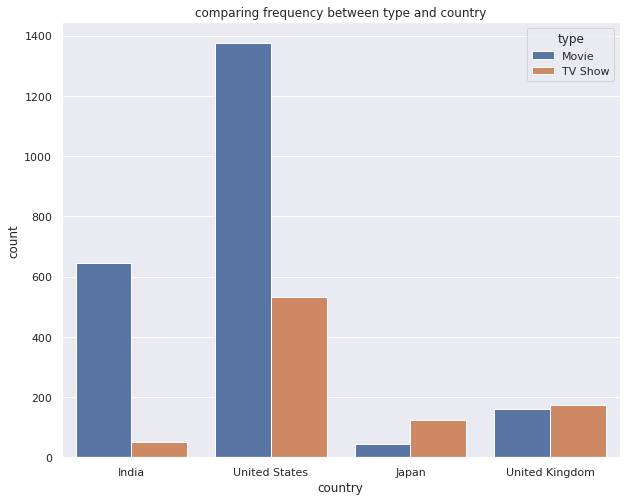

In [48]:
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=df_cunt)
plt.title('comparing frequency between type and country')
plt.show()

## **Movies are the most famous medium of all of these countries**

In [61]:
df['type'].value_counts(normalize=True)

Movie      0.674833
TV Show    0.325167
Name: type, dtype: float64

# **Movies have an edge over TV-Shows overall**